Target variable: is_cancelled

| Index | Variable                      | Description                                                      |
|-------|-------------------------------|------------------------------------------------------------------|
| 1     | hotel                         | Type of hotel (Resort Hotel, City Hotel)                          |
| 2     | is_canceled                   | Reservation cancellation status (0 = not canceled, 1 = canceled)  |
| 3     | lead_time                     | Number of days between booking and arrival                        |
| 4     | arrival_date_year             | Year of arrival                                                   |
| 5     | arrival_date_month            | Month of arrival                                                  |
| 6     | arrival_date_week_number      | Week number of the year for arrival                               |
| 7     | arrival_date_day_of_month     | Day of the month of arrival                                       |
| 8     | stays_in_weekend_nights       | Number of weekend nights (Saturday and Sunday) the guest stayed or booked |
| 9     | stays_in_week_nights          | Number of week nights the guest stayed or booked                  |
| 10    | adults                        | Number of adults                                                  |
| 11    | children                      | Number of children                                                |
| 12    | babies                        | Number of babies                                                  |
| 13    | meal                          | Type of meal booked (BB, FB, HB, SC, Undefined)                   |
| 14    | country                       | Country of origin of the guest                                    |
| 15    | market_segment                | Market segment designation                                        |
| 16    | distribution_channel          | Booking distribution channel                                      |
| 17    | is_repeated_guest             | If the guest is a repeat customer (0 = not repeated, 1 = repeated) |
| 18    | previous_cancellations        | Number of previous bookings that were canceled by the customer    |
| 19    | previous_bookings_not_canceled| Number of previous bookings that were not canceled by the customer|
| 20    | reserved_room_type            | Type of reserved room                                             |
| 21    | assigned_room_type            | Type of assigned room                                             |
| 22    | booking_changes               | Number of changes made to the booking                             |
| 23    | deposit_type                  | Type of deposit made (No Deposit, Refundable, Non Refund)         |
| 24    | agent                         | ID of the travel agent responsible for the booking                |
| 25    | company                       | ID of the company responsible for the booking                     |
| 26    | days_in_waiting_list          | Number of days the booking was in the waiting list                |
| 27    | customer_type                 | Type of customer (Transient, Contract, Transient-Party, Group)    |
| 28    | adr                           | Average Daily Rate                                                |
| 29    | required_car_parking_spaces   | Number of car parking spaces required                             |
| 30    | total_of_special_requests     | Number of special requests made                                   |
| 31    | reservation_status            | Last reservation status (Check-Out, Canceled, No-Show)            |
| 32    | reservation_status_date       | Date of the last reservation status                               |
| 33    | name                          | Guest's name                                                      |
| 34    | email                         | Guest's email address                                             |
| 35    | phone-number                  | Guest's phone number                                              |
| 36    | credit_card                   | Last four digits of the guest's credit card                       |

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb



from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import numpy as np

In [33]:
hotel_data = pd.read_csv('hotel_booking.csv')

In [34]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [35]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [36]:
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Observations:

- **'lead_time'** has a mean of approximately 104 days with a standard deviation of about 107 days.
- The **'adults'** column has a mean of approximately 1.86, indicating that most bookings are made for around 2 adults.
- **'previous_cancellations'** and previous_bookings_not_canceled have means of 0.087 and 0.137 respectively, indicating that most bookings have no previous cancellations or non-canceled bookings.
- The **'adr'** (Average Daily Rate) column has a mean of approximately 101.83 and a large standard deviation of approximately 50.54, indicating variability in daily rates.
- **'required_car_parking_spaces'** and **'total_of_special_requests'** have means of 0.063 and 0.571 respectively.

- There are some missing values in the columns children, country, agent, and company that we need to address during data cleaning.
- Some columns like agent and company have a substantial amount of missing data.
- It might be useful to explore the distribution of cancellations (is_canceled) to understand the class distribution in our target variable.

## Handling Missing Values

In [37]:
missing_values_info = hotel_data.isnull().sum()
missing_values_info

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [38]:
high_missing_values = missing_values_info[missing_values_info > 0.2 * len(hotel_data)]
high_missing_values

company    112593
dtype: int64

### Observations:
- children: 4 missing entries
- country: 488 missing entries
- agent: 16,340 missing entries
- company: 112,593 missing entries

### Strategy:
- children: Impute with mode.
- country: Impute with mode.
- agent: Impute with mode.
- company: Drop the column


In [39]:

hotel_data['children'].fillna(hotel_data['children'].mode()[0], inplace=True)

hotel_data['country'].fillna(hotel_data['country'].mode()[0], inplace=True)


hotel_data['agent'].fillna(hotel_data['agent'].mode()[0], inplace=True)


hotel_data.drop('company', axis=1, inplace=True)


missing_values_after_cleaning = hotel_data.isnull().sum()



## Handling Outliers

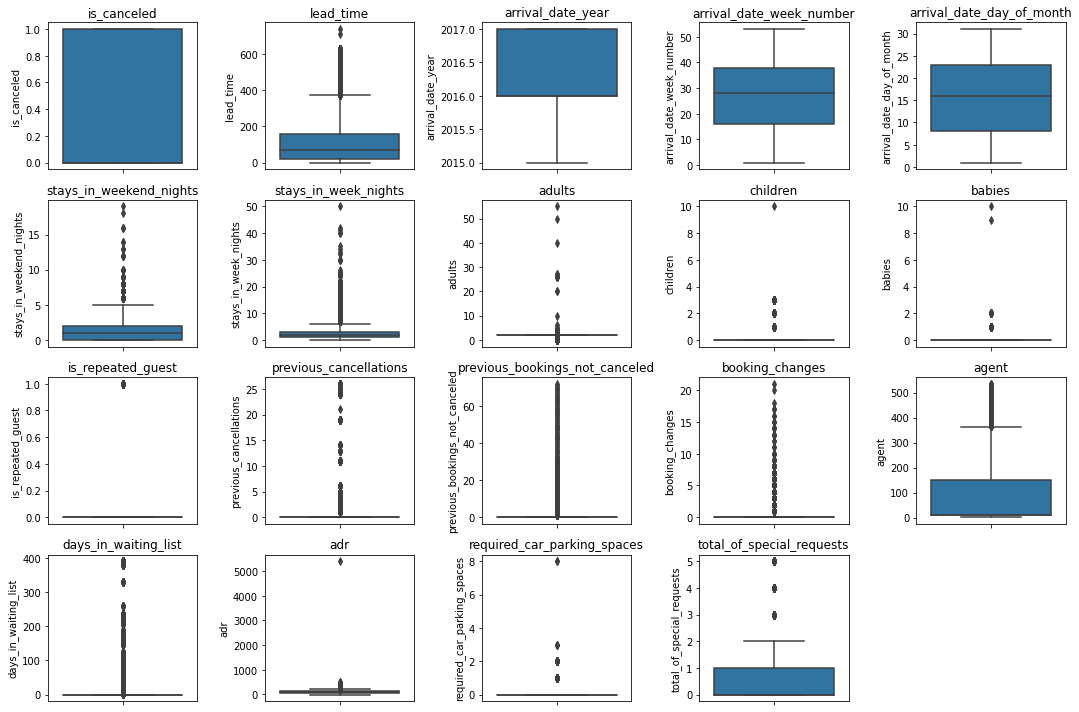

In [40]:

numerical_columns = hotel_data.select_dtypes(include=['float64', 'int64']).columns


plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(y=hotel_data[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

### Observations:

- **Lead Time**: Extremely long lead times might be accurate but could disproportionately affect our model.
- **Stays**: Unusually long stays may be legitimate but are not the norm.
- **Previous Cancellations/Bookings**: High numbers in these fields may be possible but could indicate erroneous data entry.
- **Days in Waiting List**: Extremely high values might need verification for accuracy.
- **ADR (Average Daily Rate)**: Extremely high or low values might be errors or special cases (e.g., luxury suites).


### Strategy:

- **Cap/Floor Method**: Replace outlier values with a maximum/minimum allowable value.
    - Identify the 1st and 99th percentiles for each numerical variable.
    - Cap values above the 99th percentile to the value at the 99th percentile.
    - Floor values below the 1st percentile to the value at the 1st percentile.

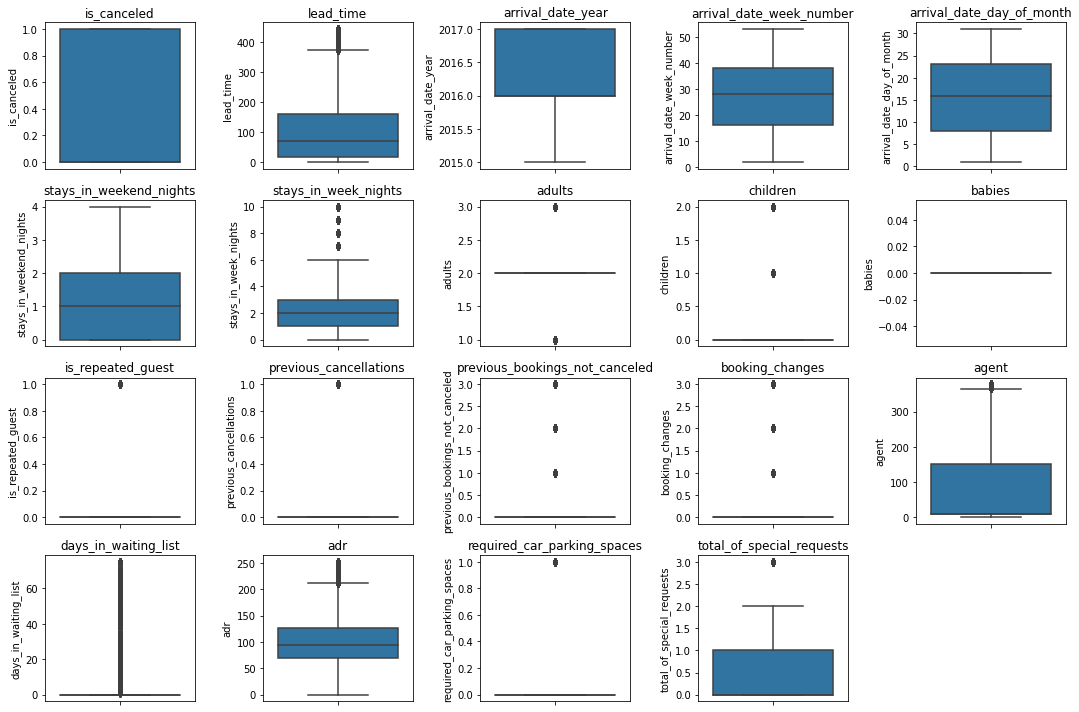

In [41]:

percentiles_1 = hotel_data[numerical_columns].quantile(0.01)
percentiles_99 = hotel_data[numerical_columns].quantile(0.99)


hotel_data_capped = hotel_data.copy()
hotel_data_capped[numerical_columns] = hotel_data[numerical_columns].clip(lower=percentiles_1, upper=percentiles_99, axis=1)


plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(y=hotel_data_capped[col])
    plt.title(col)
    plt.tight_layout()

plt.show()


### Addressing Data Types

In [42]:
hotel_data_capped.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

### Observations and Actions:
- **Date Columns**: reservation_status_date should be converted to a datetime type for accurate temporal analysis.
- **Categorical Variables**: Variables like hotel, country, market_segment, etc., are categorical and may need encoding before modeling.
- **Email, Phone Number, and Credit Card**: These might be sensitive information and unless they are crucial for analysis, it might be ethical to drop these columns to respect privacy.

In [43]:
hotel_data_capped['reservation_status_date'] = pd.to_datetime(hotel_data_capped['reservation_status_date'], errors='coerce')
hotel_data_cleaned = hotel_data_capped.drop(['name', 'email', 'phone-number', 'credit_card'], axis=1)

## Handling Duplicates

In [44]:
hotel_data_cleaned.duplicated().sum()

32080

In [45]:
hotel_data_no_duplicates = hotel_data_cleaned.drop_duplicates(keep='first')

In [46]:
hotel_data_no_duplicates.duplicated().sum()

0

# Exploratory Data Analysis (EDA)

## Target Variable Distribution

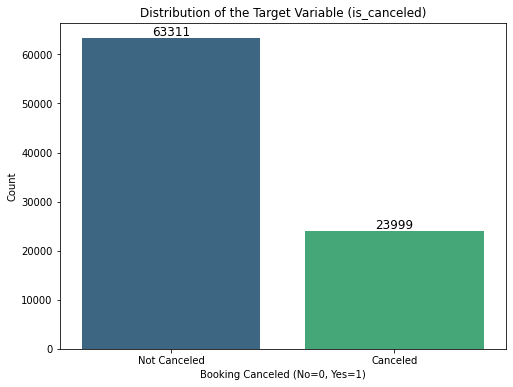

(None, 0    63311
 1    23999
 Name: is_canceled, dtype: int64)

In [47]:

cancel_counts = hotel_data_no_duplicates['is_canceled'].value_counts()


plt.figure(figsize=(8, 6))
sns.barplot(x=cancel_counts.index, y=cancel_counts.values, palette="viridis")
plt.title('Distribution of the Target Variable (is_canceled)')
plt.xlabel('Booking Canceled (No=0, Yes=1)')
plt.ylabel('Count')
plt.xticks(ticks=[0,1], labels=['Not Canceled', 'Canceled'])


for i, count in enumerate(cancel_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

plt.show(), cancel_counts


### Observations:

The distribution of the target variable is_canceled is as follows:

- **Not Canceled (0)**: 63,331 instances
- **Canceled (1)**: 24,000 instances

This indicates a somewhat imbalanced dataset, with more instances of non-cancellations than cancellations. This is important to keep in mind during model training, as we might want to use techniques to handle imbalanced data to ensure that the model doesn't become biased towards the majority class.

## Numerical Variable Distributions

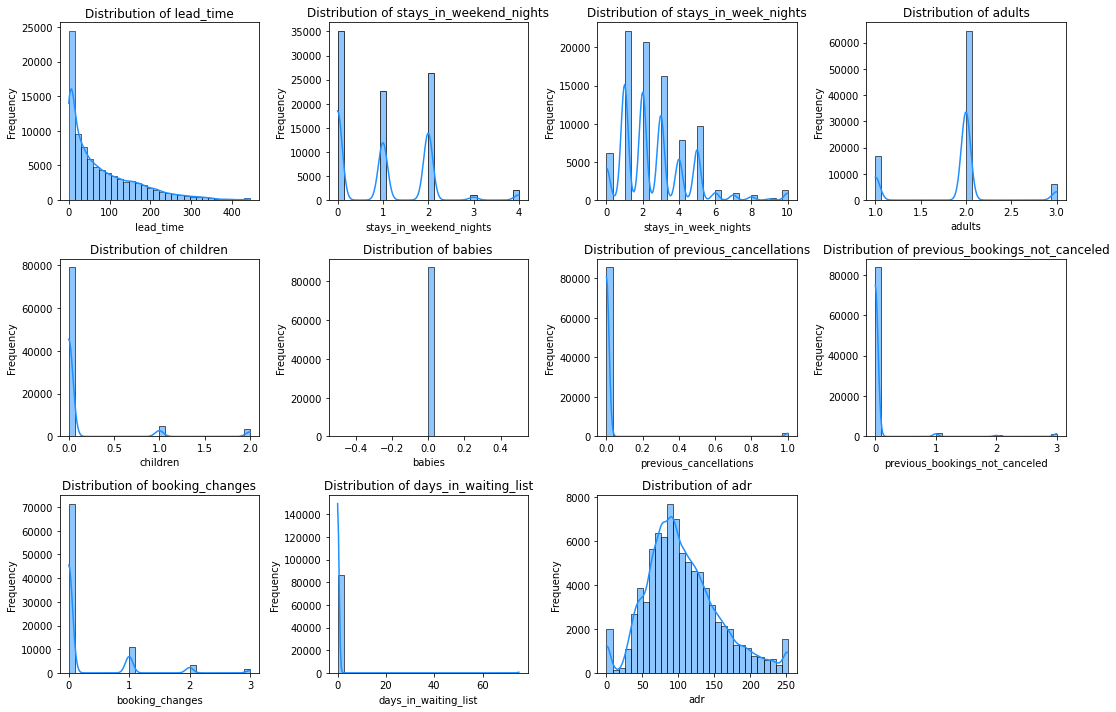

In [48]:

selected_numerical_columns = [
    'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
    'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled',
    'booking_changes', 'days_in_waiting_list', 'adr'
]


plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(hotel_data_no_duplicates[col], bins=30, kde=True, color="dodgerblue")
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()

The histograms provide insights into the distributions of selected numerical variables:

- **Lead Time**: Most bookings are made with a short lead time, although there are several made with a longer lead time.

- **Stays (Weekend & Week Nights)**: Most stays are quite short, with a mode of 0 for weekend nights and 2 for week nights.

- **Adults, Children, Babies**: The majority of bookings are made for 1 or 2 adults, with children and babies being less common.

- **Previous Cancellations & Bookings Not Canceled**: Most values are 0, indicating that for most bookings, the customer did not have previous cancellations or non-canceled bookings.

- **Booking Changes**: Most bookings were not modified after being set.

- **Days in Waiting List**: Most bookings did not spend time on a waiting list.

- **ADR (Average Daily Rate)**: ADR is somewhat normally distributed, but with a positive skew.

## Categorical Variable Counts

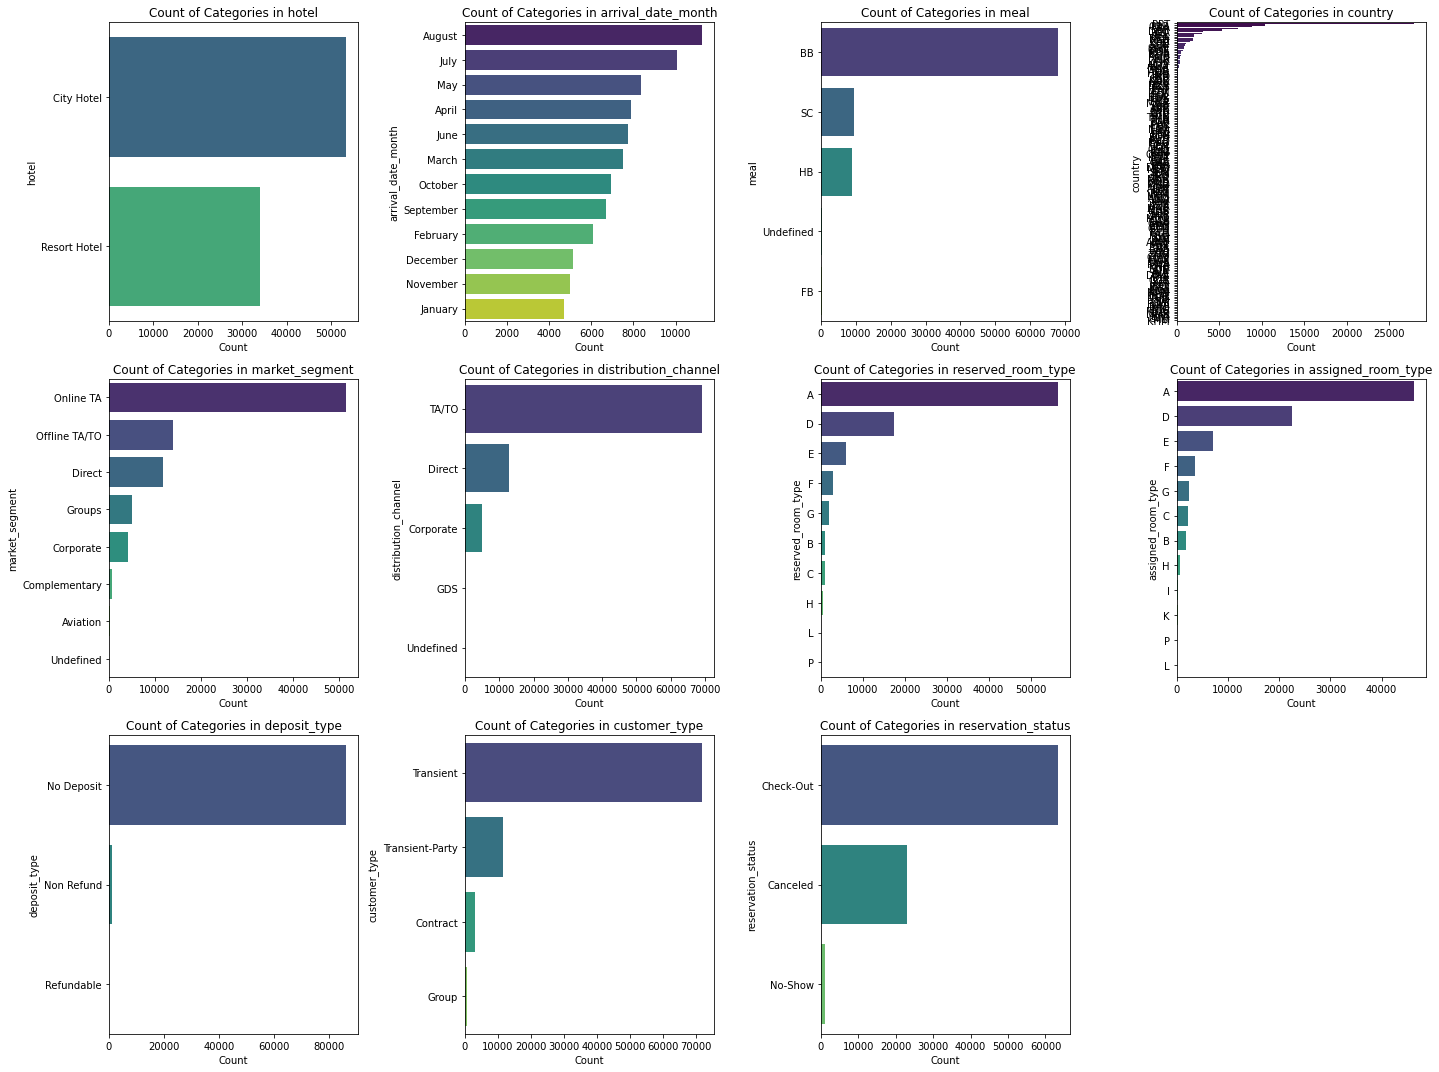

In [49]:
selected_categorical_columns = [
    'hotel', 'arrival_date_month', 'meal', 'country',
    'market_segment', 'distribution_channel', 'reserved_room_type',
    'assigned_room_type', 'deposit_type', 'customer_type','reservation_status'
]


plt.figure(figsize=(20, 15))
for i, col in enumerate(selected_categorical_columns, 1):
    plt.subplot(3, 4, i)
    sns.countplot(y=hotel_data_no_duplicates[col], order=hotel_data_no_duplicates[col].value_counts().index, palette="viridis")
    plt.title(f'Count of Categories in {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()

plt.show()

The visualizations provide insights into the categorical variables:

- **Hotel**: There are more bookings for city hotels than resort hotels.
- **Arrival Date Month**: Most bookings are made for the summer months, with August being the peak.
- **Meal**: The majority of bookings do not include a meal (SC - no meal package).
- **Country**: Most guests are from Portugal (PRT), with other countries having significantly fewer bookings.
- **Market Segment**: Online Travel Agents (TA) and Offline Travel Agents constitute the majority of the market segments.
- **Distribution Channel**: Travel agents and tour operators are the dominant distribution channels.
- **Reserved & Assigned Room Type**: The majority of rooms are type ‘A’.
- **Deposit Type**: The majority of bookings do not require a deposit.
- **Customer Type**: Most customers are transient (not part of a group or contract).

## Correlation Heatmap

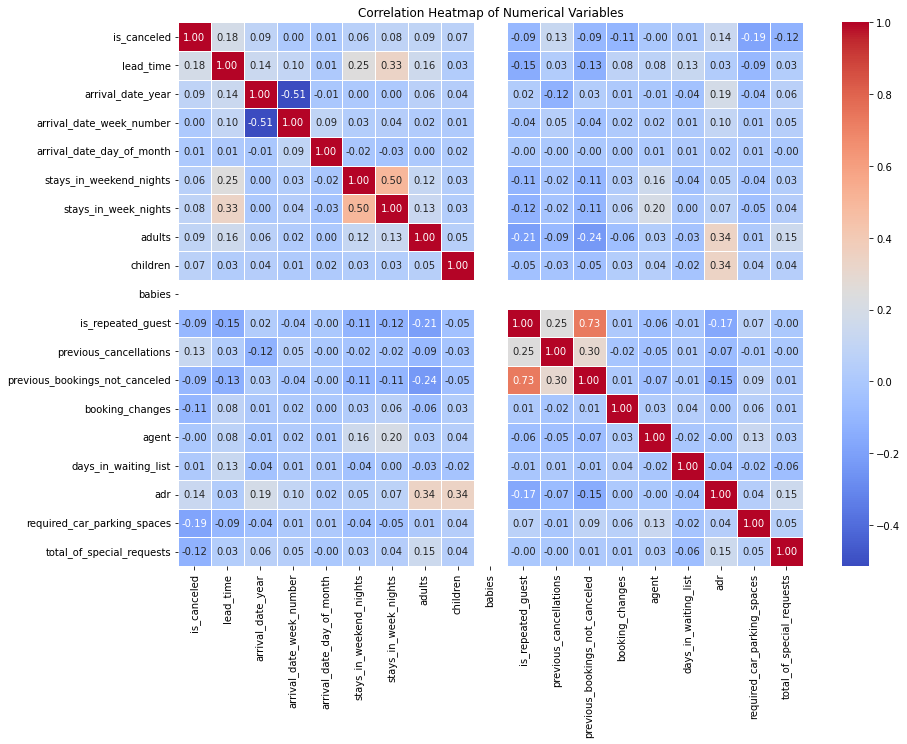

In [50]:
correlation_matrix = hotel_data_no_duplicates[numerical_columns].corr()


plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5, fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

The heatmap provides a visual representation of the correlation between numerical variables:

- **Lead Time & Other Variables**: **lead_time** shows some correlation with **is_canceled (0.25)**, suggesting that bookings made well in advance are slightly more likely to be canceled.

- **Stays (Weekend & Week Nights) & Other Variables**: **stays_in_weekend_nights** and **stays_in_week_nights** are somewhat correlated (0.51), which is intuitive as longer stays might include both week and weekend nights.

- **Previous Cancellations & Other Variables**: previous_cancellations shows a moderate correlation with **is_repeated_guest** (-0.11) and **previous_bookings_not_canceled** (-0.57).

- **ADR & Other Variables**: **adr** (Average Daily Rate) does not show very high correlation with other variables.

- No pairs of variables are highly correlated (e.g., correlation > 0.8), which is good as it means multicollinearity is likely not an issue.

## Temporal Trends

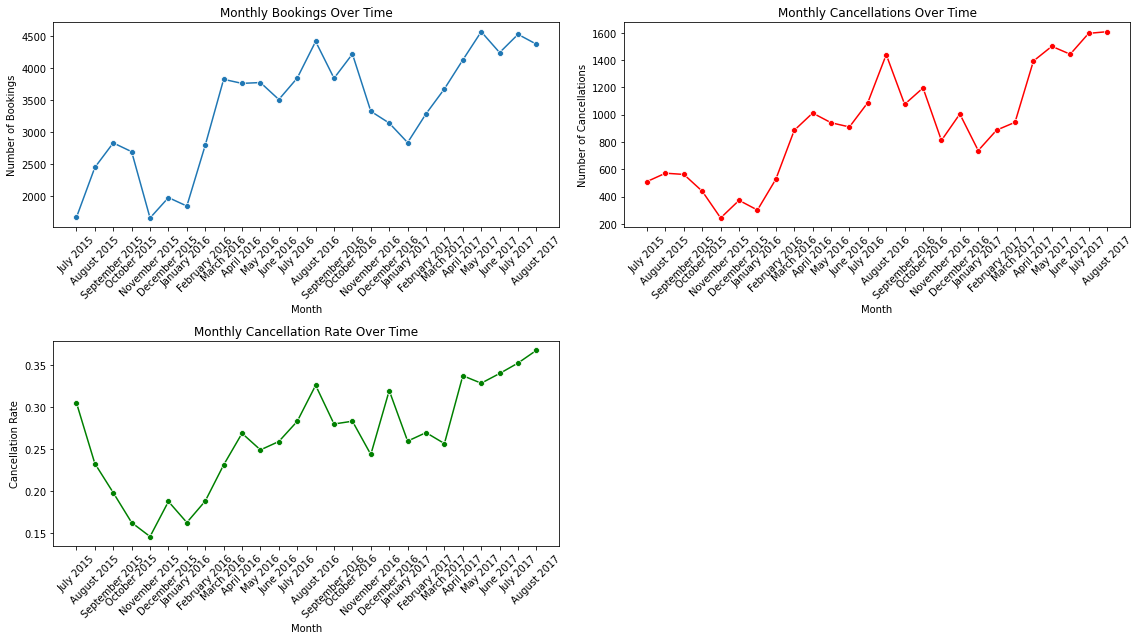

In [51]:

# Your data processing code here...
monthly_data = hotel_data_no_duplicates.groupby(['arrival_date_year', 'arrival_date_month'])['is_canceled'].agg(['count', 'sum']).reset_index()
monthly_data['month_year'] = monthly_data['arrival_date_month'] + ' ' + monthly_data['arrival_date_year'].astype(str)

months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_data['arrival_date_month'] = pd.Categorical(monthly_data['arrival_date_month'], categories=months_order, ordered=True)
monthly_data = monthly_data.sort_values(['arrival_date_year', 'arrival_date_month'])

# Calculate the cancellation rate
monthly_data['cancel_rate'] = monthly_data['sum'] / monthly_data['count']

plt.figure(figsize=(16, 9))

plt.subplot(2, 2, 1)
sns.lineplot(x='month_year', y='count', data=monthly_data, marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Bookings Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')

plt.subplot(2, 2, 2)
sns.lineplot(x='month_year', y='sum', data=monthly_data, marker='o', color='red')
plt.xticks(rotation=45)
plt.title('Monthly Cancellations Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Cancellations')

plt.subplot(2, 2, 3)
sns.lineplot(x='month_year', y='cancel_rate', data=monthly_data, marker='o', color='green')
plt.xticks(rotation=45)
plt.title('Monthly Cancellation Rate Over Time')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate')

plt.tight_layout()
plt.show()

In [52]:
hotel_data_no_duplicates.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

- **Monthly Bookings Over Time**: We observe noticeable seasonality in the bookings data, with peaks during the summer months (July and August) and troughs during the winter.

- **Monthly Cancellations Over Time**: Similar to the bookings, cancellations also peak during the summer months, likely due to the higher overall volume of bookings during this period.

- There's a clear seasonal pattern in both bookings and cancellations, with both peaking during the summer months.


## Relation between Numerical Variables and Target:

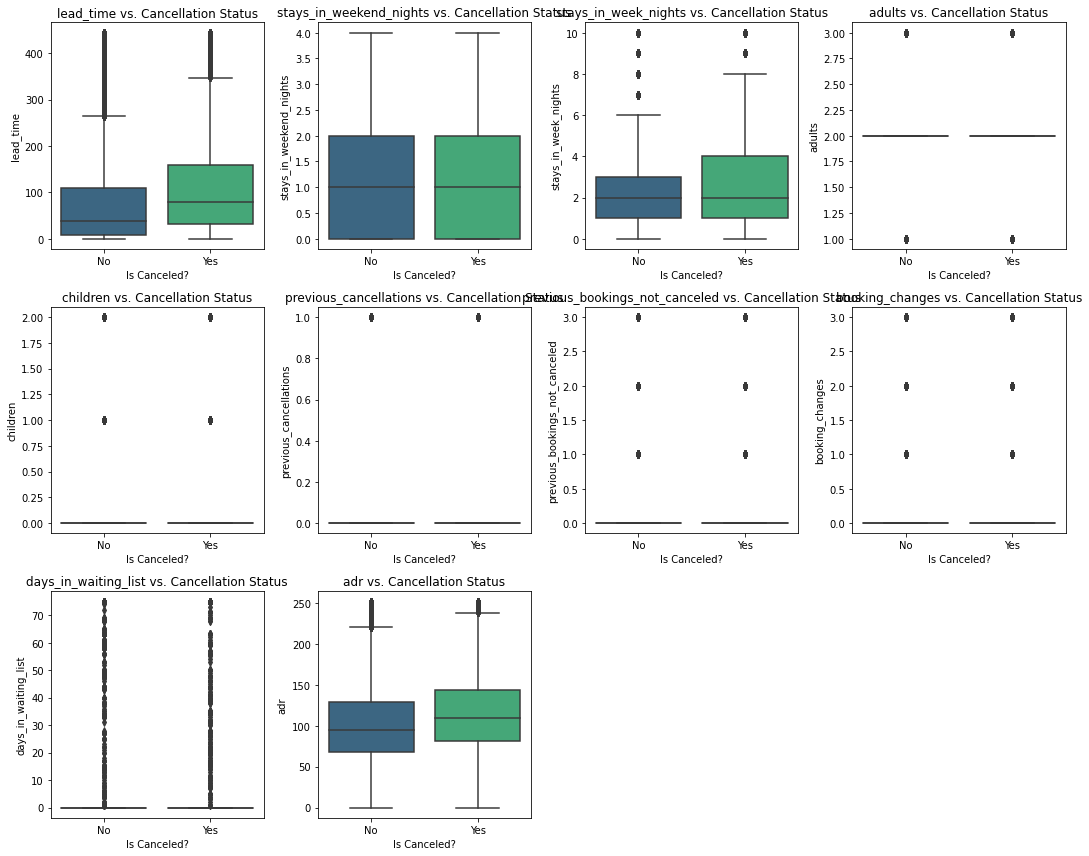

In [53]:

selected_numerical_columns_subset = [
    'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
    'adults', 'children', 'previous_cancellations', 'previous_bookings_not_canceled',
    'booking_changes', 'days_in_waiting_list', 'adr'
]


plt.figure(figsize=(15, 12))
for i, col in enumerate(selected_numerical_columns_subset, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x='is_canceled', y=col, data=hotel_data_no_duplicates, palette='viridis')
    plt.title(f'{col} vs. Cancellation Status')
    plt.xlabel('Is Canceled?')
    plt.ylabel(col)
    plt.xticks(ticks=[0,1], labels=['No', 'Yes'])
    plt.tight_layout()

plt.show()


The boxplots depict the distribution of selected numerical variables against the cancellation status:

- **Lead Time**: Higher lead times tend to be associated with more cancellations.

- **Stays (Weekend & Week Nights)**: There doesn’t seem to be a clear pattern between the length of stay and cancellations.

- **Adults & Children**: No clear distinction in the distribution between canceled and non-canceled bookings.

- **Previous Cancellations**: A higher number of previous cancellations appears to be associated with a higher likelihood of cancellation.

- **Previous Bookings Not Canceled**: The distributions seem quite similar for both canceled and not canceled bookings.

- **Booking Changes**: Most bookings, whether canceled or not, are not altered once made.

- **Days in Waiting List**: Most bookings do not spend days in the waiting list, and it doesn't show a clear pattern with cancellations.

- **ADR (Average Daily Rate)**: Higher ADR seems slightly associated with fewer cancellations.

- Some variables like **lead_time** and **previous_cancellations** might be useful predictors for cancellations, while others like **stays_in_week_nights** and **adults** might be less useful given their similar distributions across both classes.

## Relation between Categorical Variables and Target

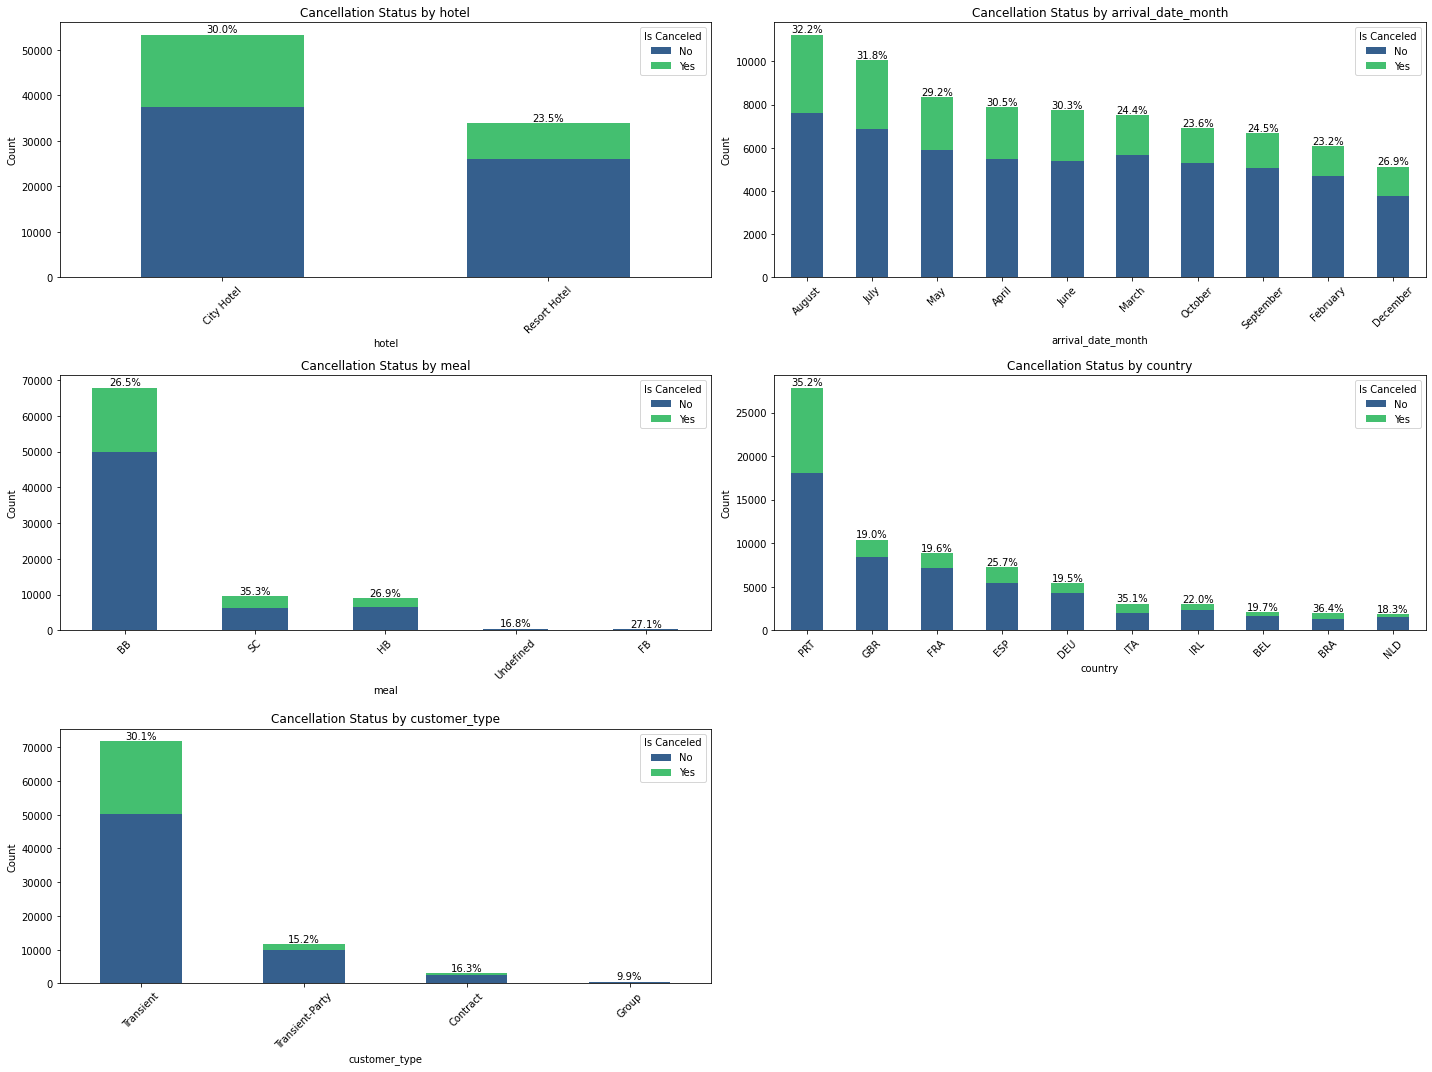

In [54]:

selected_categorical_columns_subset = ['hotel', 'arrival_date_month', 'meal', 'country', 'customer_type']


cmap = plt.get_cmap("viridis")

colors = [cmap(0.3), cmap(0.7)]  

plt.figure(figsize=(20, 15))
for i, col in enumerate(selected_categorical_columns_subset, 1):
    category_counts = hotel_data_no_duplicates.groupby([col, 'is_canceled']).size().unstack(fill_value=0)
    category_counts['total'] = category_counts[0] + category_counts[1]
    category_counts = category_counts.sort_values('total', ascending=False).head(10)
    
    plt.subplot(3, 2, i)
    category_counts[[0, 1]].plot(kind='bar', stacked=True, ax=plt.gca(), color=colors)
    plt.title(f'Cancellation Status by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Is Canceled', labels=['No', 'Yes'])

    for idx, value in enumerate(category_counts.index):
        plt.text(idx, category_counts.loc[value, 'total'], f"{100 * category_counts.loc[value, 1] / category_counts.loc[value, 'total']:.1f}%", ha='center', va='bottom')

    plt.tight_layout()

plt.show()

The stacked bar charts visualize the cancellation rates across different categories:

- **Hotel**: Both city and resort hotels have cancellations, but city hotels have a higher absolute number, potentially due to higher overall booking volume.

- **Arrival Date Month**: July and August have the highest total bookings and cancellations, aligning with the observed peak season.

- **Meal**: The "SC" (no meal) category shows a high absolute number of cancellations, potentially due to its high overall frequency.

- **Country**: Guests from Portugal (PRT) show the highest absolute number of cancellations, but this might be due to them being the most frequent guests. Interesting variations in cancellation percentages are observable in different countries.

- **Customer Type**: Transient and Transient-Party customers show higher absolute cancellations compared to other customer types.

- While higher bars indicate more total bookings, the percentage within the bars indicates the proportion of those bookings that were canceled.

- Considering both the absolute numbers and percentages is crucial to understanding the impact and significance of each category on cancellations.

## Geographical Distribution

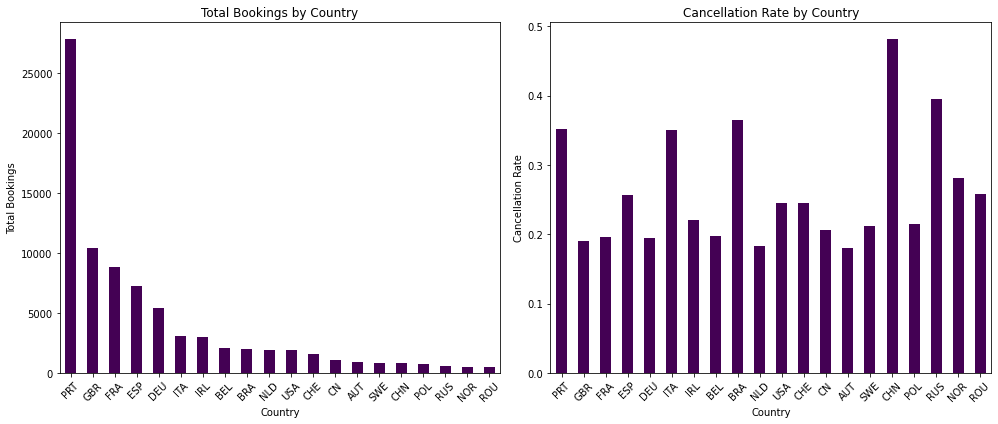

In [55]:

country_data = hotel_data_no_duplicates.groupby(['country', 'is_canceled']).size().unstack(fill_value=0)
country_data['total'] = country_data[0] + country_data[1]


top_countries_data = country_data.sort_values('total', ascending=False).head(20)


plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
top_countries_data['total'].plot(kind='bar', ax=plt.gca(), colormap="viridis")
plt.title('Total Bookings by Country')
plt.xlabel('Country')
plt.ylabel('Total Bookings')
plt.xticks(rotation=45)


plt.subplot(1, 2, 2)
(top_countries_data[1] / top_countries_data['total']).plot(kind='bar', ax=plt.gca(), colormap="viridis")
plt.title('Cancellation Rate by Country')
plt.xlabel('Country')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


The visualizations provide insights into the geographical aspects of bookings and cancellations:

- **Total Bookings by Country**: The left chart displays the total bookings for the top 20 countries. Portugal (PRT) has the highest number of bookings, followed by other countries such as the United Kingdom (GBR) and France (FRA).

- **Cancellation Rate by Country**: The right chart displays the cancellation rate for the top 20 countries. Some countries exhibit higher cancellation rates than others. For instance, Italy (ITA) and Portugal (PRT) show notably higher cancellation rates compared to others.

While some countries have high booking volumes, their cancellation rates vary, suggesting that guests from different countries may exhibit different booking and cancellation behaviors.

## Feature Selection and Engineering

Feature selection and engineering are crucial steps in the machine learning (ML) pipeline because they significantly impact the performance, interpretability, and efficiency of ML models. 


We will eliminate the following columns, as they do not seem to be pertinent or directly impact booking cancellations:

- **assigned_room_type**: This feature indicates the rooms genuinely assigned to guests upon check-in. Given that the project aims to explore the primary factors behind cancellations, it's justifiable to omit this feature.
- **agent**:  This feature has an extensive range of variables, which could potentially lead to model overfitting.
- **country**: While certain countries might exhibit a higher cancellation tendency, the numerous variables within this feature could also result in overfitting.
- **reservation_status**: Given that values like 'Canceled', 'Check-Out', and 'No-Show' inherently imply cancellation status, this feature is redundant.
- **reservation_status_date**: Since the arrival date is already provided, this feature is redundant.

In [56]:
hotel_data_no_duplicates.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [57]:
hotel_data_no_duplicates = hotel_data_no_duplicates.drop(['assigned_room_type'], axis=1)
hotel_data_no_duplicates = hotel_data_no_duplicates.drop(['agent'], axis=1)
hotel_data_no_duplicates = hotel_data_no_duplicates.drop(['country'], axis=1)
hotel_data_no_duplicates = hotel_data_no_duplicates.drop(['reservation_status_date'], axis=1)
hotel_data_no_duplicates = hotel_data_no_duplicates.drop(['reservation_status'], axis=1)

Due to high number of rows, runnnig machine learning model take too much time, so in training, we will only consider the City Hotel

In [58]:
hotel_data_no_duplicates = hotel_data_no_duplicates[hotel_data_no_duplicates['hotel'] == 'City Hotel']

In [59]:
hotel_data_no_duplicates = hotel_data_no_duplicates.drop(['hotel'], axis=1)

## Encoding Categorical Variables

In [60]:
hotel_data_no_duplicates.dtypes

is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces       

In [61]:
one_hot_encode_vars = ['meal', 'market_segment',
                       'distribution_channel', 'reserved_room_type',
                        'deposit_type', 'customer_type']

hotel_data_encoded = pd.get_dummies(hotel_data_no_duplicates, columns=one_hot_encode_vars, drop_first=True)

In [62]:

ordinal_mappings = {
    'arrival_date_month': {
        'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
        'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
    }
    
}

hotel_data_encoded_ordinal = hotel_data_encoded.replace(ordinal_mappings)

In [63]:

hotel_data_encoded_ordinal.dtypes

is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
days_in_waiting_list                int64
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
meal_FB                             uint8
meal_HB                             uint8
meal_SC                             uint8
market_segment_Complementary        uint8
market_segment_Corporate          

## Data Split

In [64]:
X = hotel_data_encoded_ordinal.drop(columns='is_canceled')
y = hotel_data_encoded_ordinal['is_canceled']


# Stratification used to ensures that the distributino of the taret variable is the same in both the train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

# Model Development

### A. Model Selection:

We'll select a few classification models suitable for predicting binary outcomes (i.e., whether a booking will be canceled or not). Some common choices might include:

- Logistic Regression
- Decision Trees
- Random Forest
- Support Vector Machines (SVM)
- Gradient Boosting (e.g., XGBoost)

### B. Model Training:
We'll train the selected models using the training data (X_train and y_train).

### C. Hyperparameter Tuning:
We'll optimize the hyperparameters of the selected models to enhance their predictive performance.

# Logistic Regression

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Train Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.93      0.85     29889
           1       0.71      0.41      0.52     12830

    accuracy                           0.77     42719
   macro avg       0.75      0.67      0.68     42719
weighted avg       0.76      0.77      0.75     42719

Test Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.93      0.85      7472
           1       0.72      0.43      0.54      3208

    accuracy                           0.78     10680
   macro avg       0.76      0.68      0.70     10680
weighted avg       0.77      0.78      0.76     10680

Test Confusion Matrix:
[[6949  523]
 [1840 1368]]


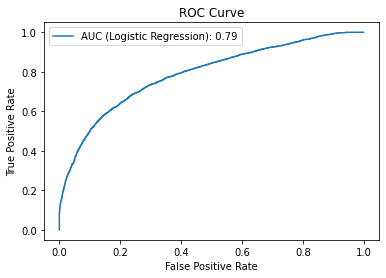

In [65]:
# Define the model
logreg = LogisticRegression(random_state=42)

# Define hyperparameters to tune
param_grid_logreg = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                     'penalty': ['l1', 'l2']}

# Set up GridSearchCV
grid_logreg = GridSearchCV(logreg, param_grid_logreg, cv=KFold(n_splits=5), scoring='accuracy')

# Fit the model
grid_logreg.fit(X_train, y_train)

# Model Evaluation
y_pred_logreg_train = grid_logreg.predict(X_train)
y_pred_logreg_test = grid_logreg.predict(X_test)

print("Train Classification Report:")
print(classification_report(y_train, y_pred_logreg_train))

print("Test Classification Report:")
print(classification_report(y_test, y_pred_logreg_test))

print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg_test))

y_prob_logreg = grid_logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_logreg)
plt.plot(fpr, tpr, label=f'AUC (Logistic Regression): {roc_auc_score(y_test, y_prob_logreg):.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# Decision Trees

Train Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86     29889
           1       0.72      0.53      0.61     12830

    accuracy                           0.80     42719
   macro avg       0.77      0.72      0.73     42719
weighted avg       0.79      0.80      0.78     42719

Test Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      7472
           1       0.70      0.53      0.60      3208

    accuracy                           0.79     10680
   macro avg       0.76      0.71      0.73     10680
weighted avg       0.78      0.79      0.78     10680

Test Confusion Matrix:
[[6756  716]
 [1522 1686]]


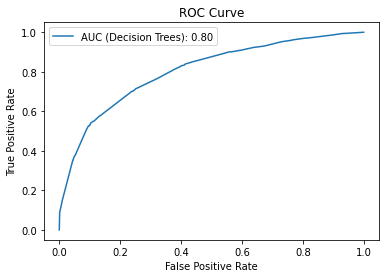

In [66]:
# Define the model
dtree = DecisionTreeClassifier(random_state=42)

# Define hyperparameters to tune
param_grid_dtree = {'max_depth': [3, 5, 7, 9],
                    'min_samples_split': [2, 5, 10],
                    'min_samples_leaf': [1, 2, 4]}

# Set up GridSearchCV
grid_dtree = GridSearchCV(dtree, param_grid_dtree, cv=KFold(n_splits=5), scoring='accuracy')

# Fit the model
grid_dtree.fit(X_train, y_train)

# Model Evaluation
y_pred_dtree_train = grid_dtree.predict(X_train)
y_pred_dtree_test = grid_dtree.predict(X_test)

print("Train Classification Report:")
print(classification_report(y_train, y_pred_dtree_train))

print("Test Classification Report:")
print(classification_report(y_test, y_pred_dtree_test))


print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dtree_test))

y_prob_dtree = grid_dtree.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_dtree)
plt.plot(fpr, tpr, label=f'AUC (Decision Trees): {roc_auc_score(y_test, y_prob_dtree):.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Random Forest

Train Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86     29889
           1       0.73      0.45      0.56     12830

    accuracy                           0.79     42719
   macro avg       0.77      0.69      0.71     42719
weighted avg       0.78      0.79      0.77     42719

Test Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      7472
           1       0.73      0.46      0.56      3208

    accuracy                           0.79     10680
   macro avg       0.76      0.69      0.71     10680
weighted avg       0.78      0.79      0.77     10680

Test Confusion Matrix:
[[6928  544]
 [1742 1466]]


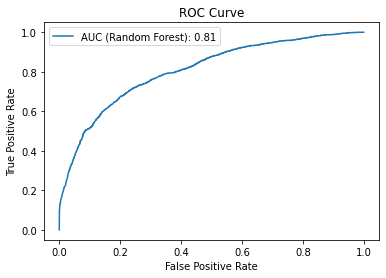

In [67]:
# Define the model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameters to tune
param_grid_rf = {'n_estimators': [100, 200],
                 'max_depth': [3, 5, 7],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

# Set up GridSearchCV
grid_rf = GridSearchCV(rf, param_grid_rf, cv=KFold(n_splits=5), scoring='accuracy')

# Fit the model
grid_rf.fit(X_train, y_train)

# Model Evaluation
y_pred_rf_train = grid_rf.predict(X_train)
y_pred_rf_test = grid_rf.predict(X_test)

print("Train Classification Report:")
print(classification_report(y_train, y_pred_rf_train))

print("Test Classification Report:")
print(classification_report(y_test, y_pred_rf_test))


print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_test))

y_prob_rf = grid_rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
plt.plot(fpr, tpr, label=f'AUC (Random Forest): {roc_auc_score(y_test, y_prob_rf):.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Xgboost

Train Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     29889
           1       0.80      0.62      0.70     12830

    accuracy                           0.84     42719
   macro avg       0.82      0.78      0.79     42719
weighted avg       0.84      0.84      0.83     42719

Test Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      7472
           1       0.74      0.56      0.64      3208

    accuracy                           0.81     10680
   macro avg       0.78      0.74      0.75     10680
weighted avg       0.80      0.81      0.80     10680

Test Confusion Matrix:
[[6843  629]
 [1416 1792]]


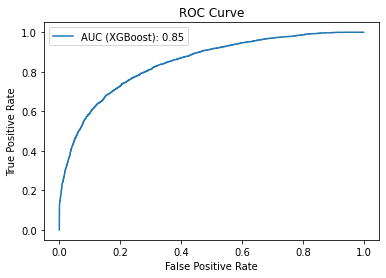

In [68]:
# Define the model
xgboost = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define hyperparameters to tune
param_grid_xgboost = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
}

# Set up GridSearchCV
grid_xgboost = GridSearchCV(xgboost, param_grid_xgboost, cv=KFold(n_splits=5), scoring='accuracy')

# Fit the model
grid_xgboost.fit(X_train, y_train)

# Model Evaluation
y_pred_xgboost_train = grid_xgboost.predict(X_train)
y_pred_xgboost_test = grid_xgboost.predict(X_test)

print("Train Classification Report:")
print(classification_report(y_train, y_pred_xgboost_train))

print("Test Classification Report:")
print(classification_report(y_test, y_pred_xgboost_test))

print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgboost_test))

y_prob_xgboost = grid_xgboost.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgboost)
plt.plot(fpr, tpr, label=f'AUC (XGBoost): {roc_auc_score(y_test, y_prob_xgboost):.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Support Vector Machines